### Helpers (Packages and Functions)

In [194]:
#Packages for NLP
import numpy as np
from tqdm import tqdm
import pandas as pd
import json
import string
import nltk
from nltk.corpus import stopwords
from  nltk import FreqDist
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
from textblob import TextBlob
from textblob import Word

nlp = spacy.load("en_core_web_sm")

In [3]:
#Define stopwords
punctuation = "".join([symbol for symbol in string.punctuation if symbol not in ["'", '"']])
punctuation += '–'

stopwords_list = stopwords.words('english')
stopwords_list += list(punctuation)

In [5]:
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def concat_songs(list_lyrics):
    combo = ' '.join(lyric for lyric in list_lyrics)
    return combo

In [70]:
def get_tokens(songs, remove_stop_words=True):
    """Splits a string of text into individual words"""
    #remove stop words
    stop_words = set(stopwords_list) if remove_stop_words else []
    #tokenize
    words = [x for x in songs.split() if x not in stop_words]
    words = ['N-Word' if x in ['nigga', 'niggas','n*gga','n*ggas'] else x for x in words]
    return words

In [205]:
#replace in' with ing
def replace_contraction(list_lyrics):
    result = []
    for lyric in list_lyrics:
        result.append(lyric.replace("in\'","ing"))
    return result

In [211]:
def lem_words(list_of_tokens,pos): 
    wrd_list = [Word(word).lemmatize(pos=pos) for word in list_of_tokens]
    # join the individual lemmas into a single string
    return wrd_list

## Importing DFs

In [10]:
#Load in a Dataframe all lyrics and artist names
tracks_df = pd.read_pickle('../Data-Cleaning/working_data.pkl')

In [11]:
print(tracks_df.shape)
tracks_df.head()

(27514, 31)


,Artist,Title,Album,Year,Lyrics,name,duration_ms,popularity,num_markets,album,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Year_release,Cleaned_lyrics,Lyric_words,Language
1,DJ Jazzy Jeff & The Fresh Prince,Time to Chill,"He’s The DJ, I’m The Rapper",1988-03-29,[Fresh Prince]\nFor years I have been waitin a...,Time to Chill,266040,24,79,"He's The DJ, I'm The Rapper",...,0.00172,0.000020,0.0648,0.887,170.385,4,1988,for years i have been waitin and hesitatin to ...,"[for, years, i, have, been, waitin, and, hesit...",en
3,Machine Gun Kelly,Candy,Hotel Diablo,2019-07-05,"[Intro: Trippie Redd]\nHaha, Big 14, you know ...",Candy (feat. Trippie Redd),156719,78,79,Hotel Diablo,...,0.00829,0.000000,0.1820,0.480,98.019,4,2019,haha big 14 you know what the fuck going on ...,"[haha, big, 14, you, know, what, the, fuck, go...",en
4,Big Pun,You Ain’t a Killer,Capital Punishment,1998-04-28,[Verse 1]\nThe harsh realities of life have ta...,You Ain't a Killer,254866,57,79,Capital Punishment (Explicit Version),...,0.13400,0.000000,0.1120,0.745,90.945,4,1998,the harsh realities of life have taken toll ev...,"[the, harsh, realities, of, life, have, taken,...",en
6,Das EFX,Buck-Buck,Hold It Down,1995-09-26,*Skoob and Dray giving shoutouts*\n\nChorus:\n...,Buck-Buck,193626,22,78,Hold It Down,...,0.29300,0.000000,0.2950,0.531,95.677,4,1995,skoob and dray giving shoutouts chorus well ...,"[skoob, and, dray, giving, shoutouts, chorus, ...",en
9,Kool Moe Dee,To the Beat Y’all,Funke Funke Wisdom,1991-06-11,To the beat...\n\n(To the beat y'all\nTo the b...,To The Beat Y'All,201266,11,77,"Funke, Funke Wisdom",...,0.01930,0.000107,0.3950,0.578,108.597,4,1991,to the beat to the beat y'all to the beat y'a...,"[to, the, beat, to, the, beat, y'all, to, the,...",en


In [12]:
#Load in a Dataframe all lyrics by artist names
artists_df = pd.read_pickle('../Data-Cleaning/artist_data.pkl')

In [13]:
print(artists_df.shape)
artists_df.head()

(277, 3)


,Artist,Cleaned_lyrics,Number_songs
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59


In [14]:
#Load in a Dataframe all lyrics by release year
year_df = pd.read_pickle('../Data-Cleaning/year_data.pkl')

In [15]:
print(year_df.shape)
year_df.head()

(32, 3)


,Year_release,Cleaned_lyrics,Number_songs
10,1988,[for years i have been waitin and hesitatin to...,87
11,1989,[yo this one aight though yo me and cool v dis...,118
12,1990,[ah and we do it like this ah and we do it lik...,104
13,1991,[to the beat to the beat y'all to the beat y'...,182
14,1992,[hello is anybody out there alright well check...,159


## EDA for artists

### Features eng

In [ ]:
#total words for each artist
#unique words for each artist
#words frequency
#word clouts
#worlds per songs average
#unique words per sonfs
#TF-IDF
#LDA

In [156]:
#create a column with all the lyrics
artists_df['all_Lyrics'] = artists_df.Cleaned_lyrics.apply(lambda x: concat_songs(x))

In [157]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,Count_words
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,391433
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,159012
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,691936
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,420433
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,170070


In [158]:
#tokenize the lyrics
artists_df['tokens_w_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=False))
artists_df['tokens_w_out_stpw'] = artists_df.all_Lyrics.apply(lambda x: get_tokens(x,remove_stop_words=True))

In [163]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fuckin', kitche...","[go, hard, mother, fuckin', kitchen, half, thi..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelin's, she, got, me, in, my, feeli...","[feelin's, got, feelin's, got, feelin's, forre..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, yeah, yeah, hear, he..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y..."


In [206]:
#replace in' with ing and remove 's
artists_df['tokens_w_stpw'] = artists_df.tokens_w_stpw.apply(lambda x: replace_contraction(x))
artists_df['tokens_w_out_stpw'] = artists_df.tokens_w_out_stpw.apply(lambda x: replace_contraction(x))

In [207]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelings, she, got, me, in, my, feeli...","[feelings, got, feelings, got, feelings, forre..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, yeah, yeah, hear, he..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y..."


In [217]:
#Lemmatize verbs and nouns
artists_df['tokens_stpw_lemma'] = artists_df.tokens_w_stpw.apply(lambda x: lem_words(x,'n'))
artists_df['tokens_no_stpw_lemma'] = artists_df.tokens_w_out_stpw.apply(lambda x: lem_words(x,'n'))

In [218]:
artists_df['tokens_stpw_lemma'] = artists_df.tokens_stpw_lemma.apply(lambda x: lem_words(x,'v'))
artists_df['tokens_no_stpw_lemma'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: lem_words(x,'v'))

In [219]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi...","[i, go, hard, in, the, mother, fuck, kitchen, ...","[go, hard, mother, fuck, kitchen, half, thing,..."
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelings, she, got, me, in, my, feeli...","[feelings, got, feelings, got, feelings, forre...","[in, my, feel, she, get, me, in, my, feel, she...","[feel, get, feel, get, feel, forreal, get, fee..."
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'...","[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'..."
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, yeah, yeah, hear, he...","[i, can, hear, your, heartbeat, you're, scar, ...","[hear, heartbeat, scar, yeah, yeah, hear, hear..."
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y...","[at, 7, be, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y..."


In [220]:
#count the words for the entire lyrics
artists_df['Count_words_w_stpw'] = artists_df.tokens_stpw_lemma.apply(lambda x: len(x))
artists_df['Count_words_no_stpw'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: len(x))

In [221]:
#count of unique words used per artists
artists_df['Unique_words_w_stpw'] = artists_df.tokens_stpw_lemma.apply(lambda x: len(set(x)))
artists_df['Unique_words_no_stpw'] = artists_df.tokens_no_stpw_lemma.apply(lambda x: len(set(x)))

In [260]:
#Replace name of artist with $ sign
artists_df['Artist_Name'] = artists_df.Artist.apply(lambda x: x.replace('$','S'))

In [273]:
#average words used per each artist
artists_df['Avg_words'] = artists_df.Count_words_no_stpw/artists_df.Number_songs

In [274]:
artists_df.head()

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma,Count_words_w_stpw,Count_words_no_stpw,Unique_words_w_stpw,Unique_words_no_stpw,Artist_Name,Avg_words
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi...","[i, go, hard, in, the, mother, fuck, kitchen, ...","[go, hard, mother, fuck, kitchen, half, thing,...",79990,45289,5666,5549,2 Chainz,286.639241
1,21 Savage,[in my feelin's she got me in my feelin's she ...,58,in my feelin's she got me in my feelin's she g...,"[in, my, feelings, she, got, me, in, my, feeli...","[feelings, got, feelings, got, feelings, forre...","[in, my, feel, she, get, me, in, my, feel, she...","[feel, get, feel, get, feel, forreal, get, fee...",32303,19471,2572,2468,21 Savage,335.706897
2,2Pac,[yo c'mon man what do you mean you don't wanna...,191,yo c'mon man what do you mean you don't wanna ...,"[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'...","[yo, c'mon, man, what, do, you, mean, you, don...","[yo, c'mon, man, mean, wanna, ride, N-Word, c'...",137314,75372,6325,6207,2Pac,394.617801
3,50 Cent,[i can hear your heartbeat you're scared yeah ...,158,i can hear your heartbeat you're scared yeah y...,"[i, can, hear, your, heartbeat, you're, scared...","[hear, heartbeat, scared, yeah, yeah, hear, he...","[i, can, hear, your, heartbeat, you're, scar, ...","[hear, heartbeat, scar, yeah, yeah, hear, hear...",87103,48218,5569,5451,50 Cent,305.177215
4,A$AP Ferg,[at 7 am i wake up hit the green i hit my teet...,59,at 7 am i wake up hit the green i hit my teeth...,"[at, 7, am, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y...","[at, 7, be, i, wake, up, hit, the, green, i, h...","[7, wake, hit, green, hit, teeth, listerine, y...",34364,19734,3407,3297,ASAP Ferg,334.474576


In [276]:
#unique words taking in account number of songs
artists_df['Avg_uniq_words'] = artists_df.Unique_words_no_stpw/artists_df.Number_songs

### Graphs

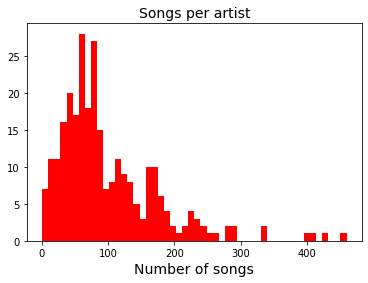

In [223]:
# How many songs do I have for each artist?
plt.hist(artists_df.Number_songs,bins=50,color = 'r')
plt.xlabel("Number of songs", fontsize=14)
plt.title("Songs per artist", fontsize=14)
plt.show()

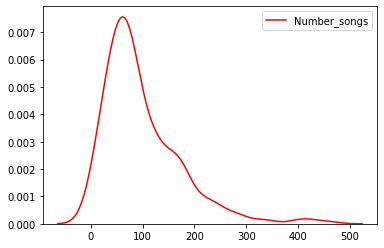

In [224]:
sns.kdeplot(artists_df.Number_songs, color = 'r')
plt.show()

In [298]:
artists_df.sort_values(by = 'Count_words_no_stpw',ascending=False).head(25)

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma,Count_words_w_stpw,Count_words_no_stpw,Unique_words_w_stpw,Unique_words_no_stpw,Artist_Name,Avg_words,Avg_uniq_words
124,K-Rino,[and seeing the multitudes he went up on a mou...,459,and seeing the multitudes he went up on a moun...,"[and, seeing, the, multitudes, he, went, up, o...","[seeing, multitudes, went, mountain, seated, d...","[and, see, the, multitude, he, go, up, on, a, ...","[see, multitude, go, mountain, seat, disciple,...",311108,167721,14363,14237,K-Rino,365.405229,31.017429
72,E-40,[c'mon tiger i'm finna take you to school up ...,429,c'mon tiger i'm finna take you to school up ...,"[c'mon, tiger, i'm, finna, take, you, to, scho...","[c'mon, tiger, i'm, finna, take, school, put, ...","[c'mon, tiger, i'm, finna, take, you, to, scho...","[c'mon, tiger, i'm, finna, take, school, put, ...",257303,148652,14210,14097,E-40,346.508159,32.860140
238,Tech N9ne,[i got a story to tell 'bout when i ginormousl...,403,i got a story to tell 'bout when i ginormously...,"[i, got, a, story, to, tell, 'bout, when, i, g...","[got, story, tell, 'bout, ginormously, fell, s...","[i, get, a, story, to, tell, 'bout, when, i, g...","[get, story, tell, 'bout, ginormously, fell, s...",273684,148630,13911,13789,Tech N9ne,368.808933,34.215881
97,Gucci Mane,[da honorable cnote rip to pimp and odb gett...,405,da honorable cnote rip to pimp and odb getti...,"[da, honorable, cnote, rip, to, pimp, and, odb...","[da, honorable, cnote, rip, pimp, odb, getting...","[da, honorable, cnote, rip, to, pimp, and, odb...","[da, honorable, cnote, rip, pimp, odb, get, he...",203113,119335,9461,9348,Gucci Mane,294.654321,23.081481
232,Snoop Dogg,[yeah lalala lala lala la la la la lalala lala...,335,yeah lalala lala lala la la la la lalala lala ...,"[yeah, lalala, lala, lala, la, la, la, la, lal...","[yeah, lalala, lala, lala, la, la, la, la, lal...","[yeah, lalala, lala, lala, la, la, la, la, lal...","[yeah, lalala, lala, lala, la, la, la, la, lal...",183567,100988,8920,8801,Snoop Dogg,301.456716,26.271642
241,The Game,[you know what the fuck be pissing me off the ...,276,you know what the fuck be pissing me off the o...,"[you, know, what, the, fuck, be, pissing, me, ...","[know, fuck, pissing, motherfuckers, think, ru...","[you, know, what, the, fuck, be, piss, me, off...","[know, fuck, piss, motherfucker, think, run, b...",162464,92332,9321,9201,The Game,334.536232,33.336957
45,Chamillionaire,[we goin lose everything we taught to get mayn...,264,we goin lose everything we taught to get mayn ...,"[we, goin, lose, everything, we, taught, to, g...","[goin, lose, everything, taught, get, mayn, do...","[we, goin, lose, everything, we, teach, to, ge...","[goin, lose, everything, teach, get, mayn, don...",161061,88422,8790,8667,Chamillionaire,334.931818,32.829545
184,Nas,[uhh uhh uhhh uhhh uhhh no idea's original t...,247,uhh uhh uhhh uhhh uhhh no idea's original th...,"[uhh, uhh, uhhh, uhhh, uhhh, no, idea's, origi...","[uhh, uhh, uhhh, uhhh, uhhh, idea's, original,...","[uhh, uhh, uhhh, uhhh, uhhh, no, idea's, origi...","[uhh, uhh, uhhh, uhhh, uhhh, idea's, original,...",152130,86269,9966,9848,Nas,349.267206,39.870445
34,Boosie Badazz,[take 'em back hatch take 'em back take 'em ba...,281,take 'em back hatch take 'em back take 'em bac...,"[take, 'em, back, hatch, take, 'em, back, take...","[take, 'em, back, hatch, take, 'em, back, take...","[take, 'em, back, hatch, take, 'em, back, take...","[take, 'em, back, hatch, take, 'em, back, take...",149640,85978,6884,6777,Boosie Badazz,305.971530,24.117438
236,T.I.,[aye bend that ass over and let it move back c...,241,aye bend that ass over and let it move back co...,"[aye, bend, that, ass, over, and, let, it, mov...","[aye, bend, ass, let, move, back, come, kick, ...","[aye, bend, that, as, over, and, let, it, move...","[aye, bend, as, let, move, back, come, kick, w...",154018,84101,7874,7757,T.I.,348.9668

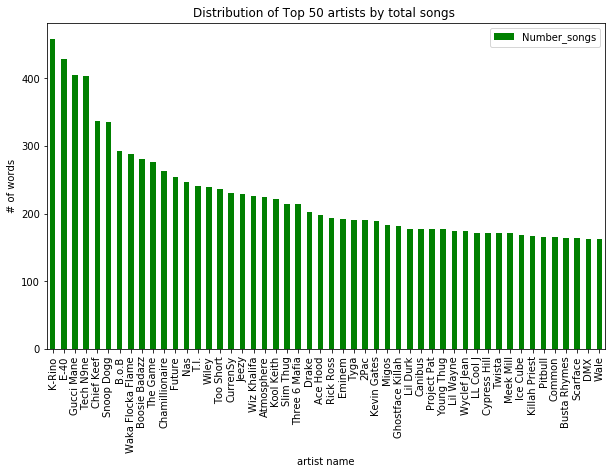

In [325]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Number_songs',ascending=False).head(50).set_index('Artist_Name')['Number_songs'].plot(kind='bar', ax=axes,color='green')
axes.set_title('Distribution of Top 50 artists by total songs ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

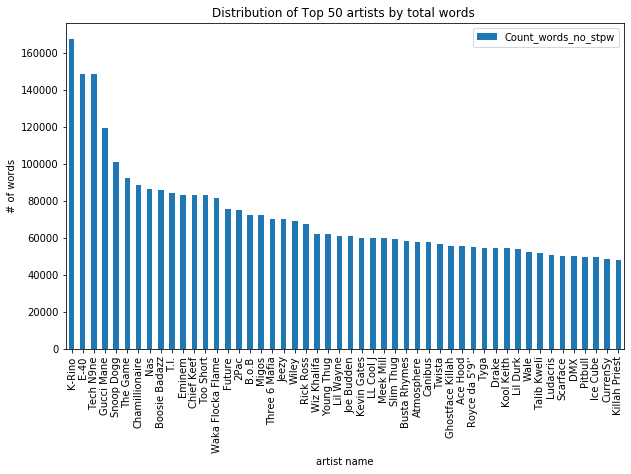

In [318]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Count_words_no_stpw',ascending=False).head(50).set_index('Artist_Name')['Count_words_no_stpw'].plot(kind='bar', ax=axes)
axes.set_title('Distribution of Top 50 artists by total words ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

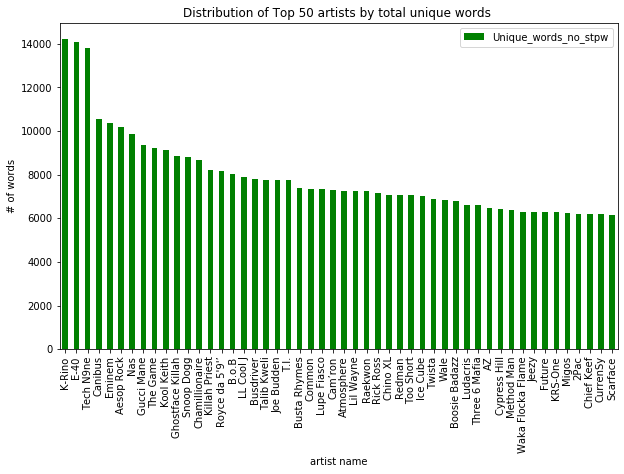

In [326]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Unique_words_no_stpw',ascending=False).head(50).set_index('Artist_Name')['Unique_words_no_stpw'].plot(kind='bar', ax=axes,color='green')
axes.set_title('Distribution of Top 50 artists by total unique words ')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

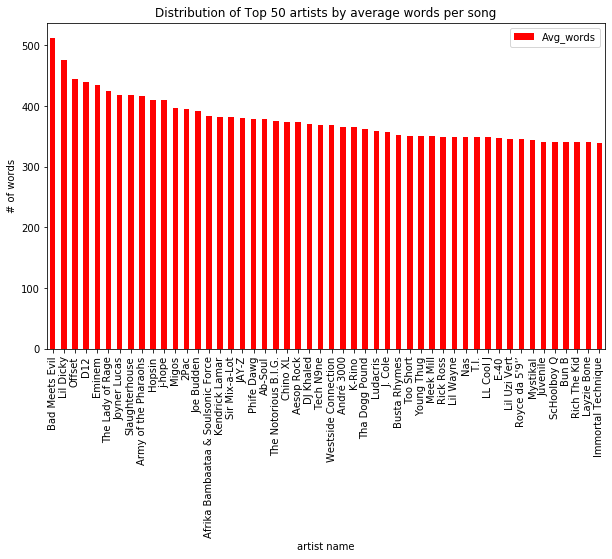

In [330]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

artists_df.sort_values(by = 'Avg_words',ascending=False).head(50).set_index('Artist_Name')['Avg_words'].plot(kind='bar', ax=axes,color='red')
axes.set_title('Distribution of Top 50 artists by average words per song')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

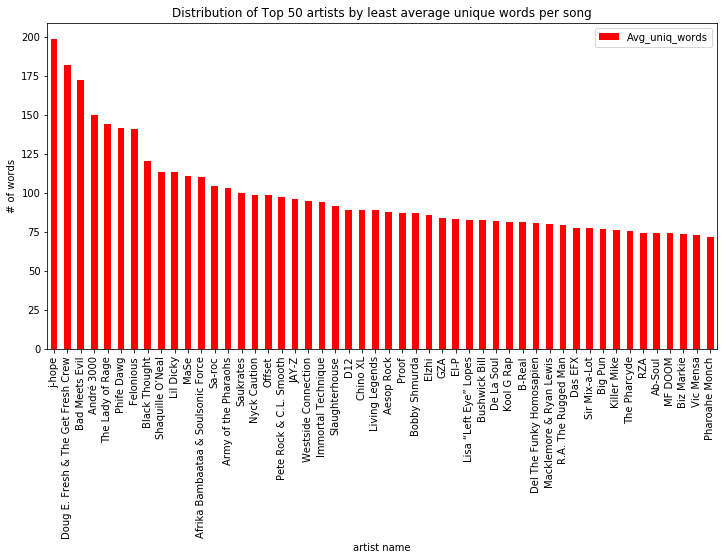

In [338]:
# Create and label an histogram for artists indicators

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6))

artists_df.sort_values(by = 'Avg_uniq_words',ascending=False).head(50).set_index('Artist_Name')['Avg_uniq_words'].plot(kind='bar', ax=axes,color='red')
axes.set_title('Distribution of Top 50 artists by least average unique words per song')
axes.set_xlabel("artist name")
axes.set_ylabel("# of words")
axes.legend()
plt.show()

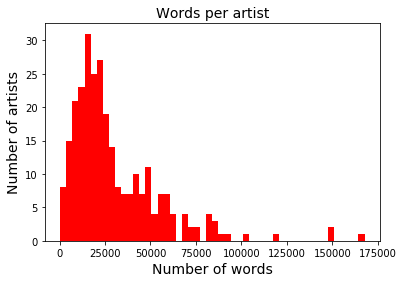

In [270]:
# total words for each artist?
plt.hist(artists_df.Count_words_no_stpw,50,color = 'r')
plt.xlabel("Number of words", fontsize=14)
plt.ylabel("Number of artists", fontsize=14)
plt.title("Words per artist", fontsize=14)
plt.show()

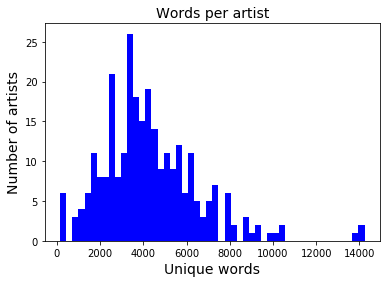

In [333]:
# unique words per artist
plt.hist(artists_df.Unique_words_no_stpw,50,color = 'b')
plt.xlabel("Unique words", fontsize=14)
plt.ylabel("Number of artists", fontsize=14)
plt.title("Words per artist", fontsize=14)
plt.show()

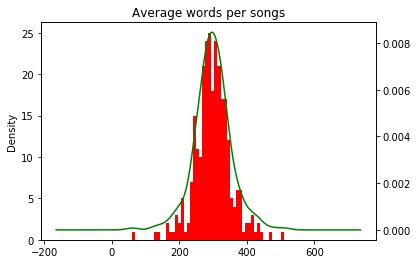

In [335]:
#Showing the distribution of total unique words used
artists_df.Avg_words.plot(kind='hist',color='r',bins=50)
artists_df.Avg_words.plot(kind='kde', secondary_y=True,color='green')
plt.title('Average words per songs')
plt.show()

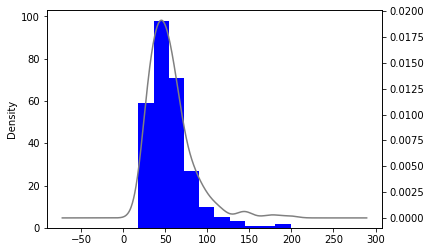

In [286]:
#Showing the distribution of average unique words used
artists_df.Avg_uniq_words.plot(kind='hist',color='blue')
artists_df.Avg_uniq_words.plot(kind='kde', secondary_y=True,color='gray')

In [ ]:
# iterate through the csv file 
val = [] 
      
    # typecaste each val to string 
for x in df.CONTENT:
    val.append(str(x))

In [ ]:
val

In [ ]:
# split the value 
tokens=[]
for x in val:
    tokens += x.split()

In [ ]:
tokens

In [ ]:
len(tokens)

In [ ]:
# Converts each token into lowercase 
tokenss = []
for val in tokens:
        tokenss.append(val.lower())

In [ ]:
tokenss

In [ ]:
for words in tokenss: 
    comment_words = comment_words + words + ' '

In [349]:
artists_df.head(1)

,Artist,Cleaned_lyrics,Number_songs,all_Lyrics,tokens_w_stpw,tokens_w_out_stpw,tokens_stpw_lemma,tokens_no_stpw_lemma,Count_words_w_stpw,Count_words_no_stpw,Unique_words_w_stpw,Unique_words_no_stpw,Artist_Name,Avg_words,Avg_uniq_words
0,2 Chainz,[i go hard in the mother fuckin' kitchen half ...,158,i go hard in the mother fuckin' kitchen half t...,"[i, go, hard, in, the, mother, fucking, kitche...","[go, hard, mother, fucking, kitchen, half, thi...","[i, go, hard, in, the, mother, fuck, kitchen, ...","[go, hard, mother, fuck, kitchen, half, thing,...",79990,45289,5666,5549,2 Chainz,286.639241,35.120253


In [374]:
len(artists_df.tokens_no_stpw_lemma)

277

In [375]:
lyrics = list(artists_df.tokens_no_stpw_lemma)

In [376]:
len(lyrics)

277

In [386]:
lyrics[0]

['go',
 'hard',
 'mother',
 'fuck',
 'kitchen',
 'half',
 'thing',
 'whole',
 'thing',
 'N-Word',
 "i'm",
 'pitchin',
 'hit',
 'soda',
 'make',
 'N-Word',
 'start',
 'whip',
 'hit',
 'choppa',
 'make',
 'N-Word',
 'start',
 'flip',
 'go',
 'hard',
 'mother',
 'fuck',
 'kitchen',
 'half',
 'thing',
 'whole',
 'thing',
 'N-Word',
 "i'm",
 'pitchin',
 'hit',
 'soda',
 'make',
 'N-Word',
 'start',
 'whip',
 'hit',
 'choppa',
 'make',
 'N-Word',
 'start',
 'flip',
 'go',
 'hard',
 'mother',
 'fuckin',
 'kitchen',
 'use',
 'baby',
 'bottle',
 'lean',
 'wifey',
 'say',
 "i'm",
 'trippin',
 'plus',
 'get',
 'maybelline',
 'smear',
 'right',
 'zipper',
 'i’m',
 'kama',
 'sutra',
 'reader',
 'conjure',
 'drinker',
 'hot',
 'stave',
 'smoke',
 'like',
 'reefer',
 'work',
 'ain’t',
 'bout',
 'shit',
 'that’s',
 'cheaper',
 'ho',
 'ain’t',
 'bout',
 'shit',
 'that’s',
 'cheaper',
 'blow',
 'strong',
 'that’s',
 'weaker',
 'wait',
 'status',
 'change',
 'weight',
 'wait',
 'meal',
 'already',
 'put'

In [393]:
all_lyrics = []
for lyric in lyrics:
    for token in lyric:
        all_lyrics.append(token)

In [395]:
len(all_lyrics)

8285331

In [396]:
lyrics_words=concat_songs(all_lyrics)

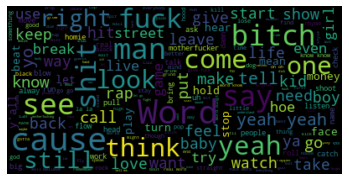

In [403]:
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(lyrics_words)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

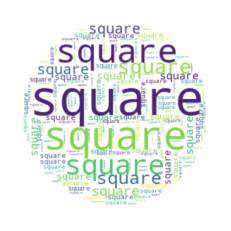

In [113]:
text = "square"

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(background_color="white", repeat=True, mask=mask)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="gaussian")
plt.show()

In [ ]:
!pip install spacy

In [120]:
# !pip install spacy

import spacy

# in your terminal, specifically your repo enter:
# "python -m spacy download en"

In [ ]:
!python -m spacy download en

In [121]:
sp = spacy.load('en')

In [122]:
sp = spacy.load('en')
#the sentence is your document tokens
sentence6 = sp(u'something sticking definitely bothering narrative liberal 2018 basically moderates winning course decision sexy storyline think votes count went')

In [130]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.lemma_)

Apple
be
look
at
buy
U.K.
startup
for
$
1
billion


In [ ]:
#this is just a test to see if it works
for word in sentence6:
    print(word.text,  word.lemma_)

In [ ]:
#Looking at the distribution
plt.style.use('ggplot')
tracks_df.speechiness.hist()
plt.show()